In [3]:
#Install required packages
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib


<IPython.core.display.Javascript object>


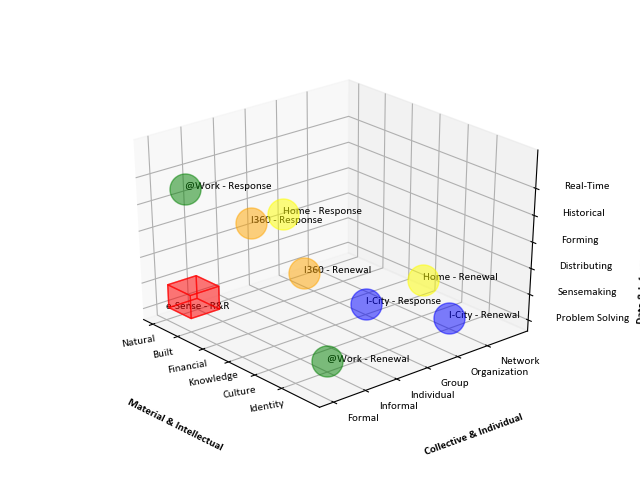

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = 'Calibri'

def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((6, 6, 6), dtype=bool)
n_voxels[:, :, :] = True
n_voxels[0,0,0]=False

facecolors = np.where(n_voxels, '#ffffff00', '#ff000050')
edgecolors = np.where(n_voxels, '#ffffff00', '#ff000090')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# categorical values for x,y,z ticks
# Reference: https://stackoverflow.com/questions/54113067/3d-scatterplot-with-strings-in-python
xs=['Natural','Built','Financial','Knowledge','Culture','Identity']
ys=['Formal','Informal','Individual', 'Group', 'Organization', 'Network']
zs=['Problem Solving','Sensemaking','Distributing','Forming','Historical','Real-Time']

#plt.xticks(range(len(xs)),xs)
#plt.yticks(range(len(ys)),ys)
#plt.zticks(range(len(zs)),zs)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2, shade=False)
ax.set(xticks=range(len(xs)), xticklabels=xs,
       yticks=range(len(ys)), yticklabels=ys,
       zticks=range(len(zs)), zticklabels=zs)
ax.set_xticklabels(xs, horizontalalignment='center', verticalalignment='center', fontsize=8, rotation=10)
ax.set_yticklabels(ys, horizontalalignment='left', verticalalignment='baseline', fontsize=8)
ax.set_zticklabels(zs, horizontalalignment='left', verticalalignment='baseline', fontsize=8)
ax.set_xlabel('Material & Intellectual', labelpad=20, fontweight ='bold', fontsize=8)
ax.set_ylabel('Collective & Individual', labelpad=20, fontweight ='bold', fontsize=8)
ax.set_zlabel('Data & Information & Intelligence', labelpad=25, fontweight ='bold', fontsize=8)


ax.scatter(1,2,3, s=500, zorder=1, alpha=0.5, c='orange')
ax.text(1,2,3, "I360 - Response", size=8, color='k')

ax.scatter(3,2,2, s=500, zorder=1, alpha=0.5, c='orange')
ax.text(3,2,2, "I360 - Renewal", size=8, color='k')

ax.scatter(1,3,3, s=500, zorder=1, alpha=0.5, c='yellow')
ax.text(1,3,3, "Home - Response", size=8, color='k')

ax.scatter(4,5,1, s=500, zorder=1, alpha=0.5, c='yellow')
ax.text(4,5,1, "Home - Renewal", size=8, color='k')

ax.scatter(1,0,5, s=500, zorder=1, alpha=0.5, c='green')
ax.text(1,0,5, "@Work - Response", size=8, color='k')

ax.scatter(5,1,0, s=500, zorder=1, alpha=0.5, c='green')
ax.text(5,1,0, "@Work - Renewal", size=8, color='k')

ax.scatter(3,4,0, s=500, zorder=1, alpha=0.5, c='blue')
ax.text(3,4,0, "I-City - Response", size=8, color='k')

ax.scatter(5,5,0, s=500, zorder=1, alpha=0.5, c='blue')
ax.text(5,5,0, "I-City - Renewal", size=8, color='k')

ax.text(0,0,0, "e-Sense - R&R", size=8, color='k')


plt.show()

Reference:
- Image overlay in 3d plot using python
https://stackoverflow.com/questions/13570287/image-overlay-in-3d-plot-using-python
- Change 3D background to black in matplotlib
https://stackoverflow.com/questions/51107968/change-3d-background-to-black-in-matplotlib
- Matplotlib: Annotating a 3D scatter plot
https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
- Matplotlib hiding scatters behind voxels
https://stackoverflow.com/questions/58181419/matplotlib-hiding-scatters-behind-voxels\
- Representing voxels with matplotlib
https://www.semicolonworld.com/question/60040/representing-voxels-with-matplotlib
- Centering x-tick labels between tick marks in matplotlib
https://stackoverflow.com/questions/17158382/centering-x-tick-labels-between-tick-marks-in-matplotlib